In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import os
import random
from PIL import Image
from sklearn.model_selection import GridSearchCV
import math
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display(X,num):
    random_rows = X.sample(num)
    
    rows = int(np.ceil(num / 3))
    cols = 3

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    
    for i, ax in enumerate(axes.flat):
        if i < num:
            pixel_data = random_rows.iloc[i, :-1].values.reshape((28, 28))
            label = random_rows.iloc[i, -1]
            ax.imshow(pixel_data, cmap='gray')
            ax.set_title(f'Label: {label}')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

C:\Users\Hp OMEN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

data = pd.read_csv('../Assignment 1/dataset/Skin Cancer/hmnist_28_28_L.csv')

data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


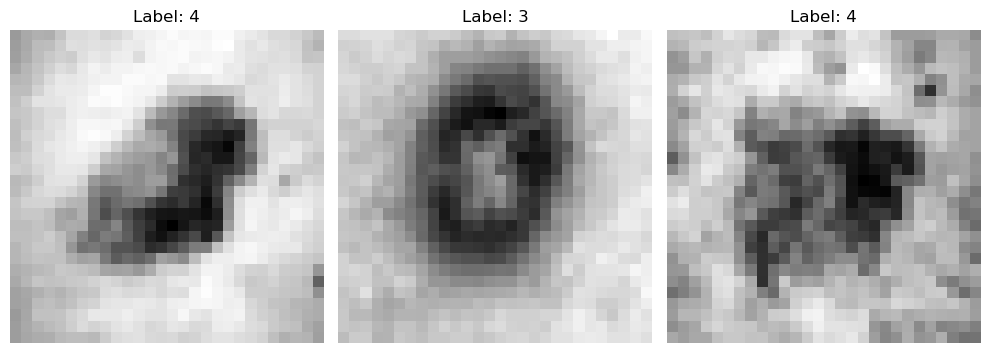

In [3]:
display(data, 3)

In [4]:
X = data.drop('label', axis=1).values
y = data['label'].values

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(14, 14, 32)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(14, 14, 32)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(7, 7, 64)),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(7, 7, 64)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(3, 3, 128)),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(3, 3, 128)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0

In [7]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
251/251 [==============================] - 23s 81ms/step - loss: 1.0058 - accuracy: 0.6716 - val_loss: 1.7584 - val_accuracy: 0.1003
Epoch 2/20
251/251 [==============================] - 21s 83ms/step - loss: 0.9059 - accuracy: 0.6911 - val_loss: 1.3711 - val_accuracy: 0.4039
Epoch 3/20
251/251 [==============================] - 20s 81ms/step - loss: 0.8681 - accuracy: 0.7004 - val_loss: 1.7021 - val_accuracy: 0.6695
Epoch 4/20
251/251 [==============================] - 21s 82ms/step - loss: 0.8387 - accuracy: 0.7104 - val_loss: 0.9380 - val_accuracy: 0.6785
Epoch 5/20
251/251 [==============================] - 21s 85ms/step - loss: 0.8126 - accuracy: 0.7178 - val_loss: 1.2630 - val_accuracy: 0.5337
Epoch 6/20
251/251 [==============================] - 20s 79ms/step - loss: 0.8006 - accuracy: 0.7203 - val_loss: 1.1815 - val_accuracy: 0.5477
Epoch 7/20
251/251 [==============================] - 20s 79ms/step - loss: 0.7818 - accuracy: 0.7269 - val_loss: 1.1631 - val_accuracy:

In [8]:
# Test the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
accuracy = accuracy_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

63/63 [==============================] - 1s 15ms/step
Accuracy: 0.6739890164752871
Precision: 0.22
Recall: 0.16
F1-score: 0.15


C:\Users\Hp OMEN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


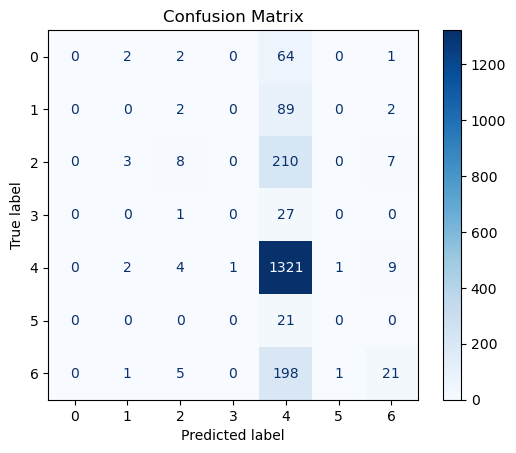

In [9]:
confusion = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix')
plt.show()